***

# R2.07
## TP3. Distances, diamètre, rayon, excentricité.

***
***

Dans le début du TP, les graphes seront orientés.

Le but de ce TP est d'implémenter l'algorithme de Floyd-Warshall, puis de l'utiliser pour définir une mesure importante sur les sommets, l'excentricité, puis d'illustrer cette notion.


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

Quelques matrices d'exemple

In [2]:


WNC=np.array([
 [0     , 4  , np.inf , np.inf],
 [ np.inf  , 0     ,-3   , 0],
 [ -2   , np.inf   , 0 ,1    ],
 [np.inf, np.inf, np.inf, 0     ]])


WCM=np.array([
 [0     , np.inf   , np.inf , np.inf, np.inf, 3],
 [ np.inf  , 0     , 15   , 1, np.inf  , np.inf   ],
 [ np.inf   , np.inf   , 0     , 16, np.inf, np.inf],
 [-2, np.inf, np.inf, 0     ,  2    , np.inf],
 [0, np.inf     , np.inf, np.inf    ,  0    , np.inf],
 [np.inf,9    , 11, np.inf, 19, 0   ]])

WCMp=np.array([
 [0     , np.inf   , np.inf , np.inf, np.inf, 3],
 [ np.inf  , 0     , 15   , 1, np.inf  , np.inf   ],
 [ np.inf   , np.inf   , 0     , 16, np.inf, np.inf],
 [2, np.inf, np.inf, 0     ,  2    , np.inf],
 [1, np.inf     , np.inf, np.inf    , 0   , np.inf],
 [np.inf,9    , 11, np.inf, 19, 0   ]])

On se donne quelques fonctions utiles pour la suite, prendre le temps de les comprendre (notamment les choix implicites).

In [3]:


def ToAdj(W,loop=False):
    """
    Converts a weight matrix to the (most plausible) corresponding adjacency matrix
    
    :param W: Weight matrix 
    :type W: two dimensionnal numpy array
    :return: a adjacency matrix
    :rtype: two dimensionnal numpy array
    
    """
    A=np.copy(W)
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if W[i][j]==np.inf:
                A[i][j]=0
            else :
                if W[i][j]==0:
                    if i!=j:
                        A[i][j]=1
                        print("Warning: a weight is equal to 0")
                    else : 
                        if loop :
                            A[i][j]=1
                        else :
                            A[i][j]=0


                else :
                    A[i][j]=1

    return A

def ToWeight(A):
    """
    Converts an  adjacency matrix to the corresponding weight matrix
    
    :param A: adjacency matrix
    :type A: two dimensionnal numpy array
    :return:  weight matrix 
    :rtype: two dimensionnal numpy array
    
    """
    n=A.shape[0]
    W=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if A[i][j]==0:
                W[i][j]=np.inf
            else :
                W[i][j]=1

    return W

print(WCM)
A=ToAdj(WCM)

print(A)



[[ 0. inf inf inf inf  3.]
 [inf  0. 15.  1. inf inf]
 [inf inf  0. 16. inf inf]
 [-2. inf inf  0.  2. inf]
 [ 0. inf inf inf  0. inf]
 [inf  9. 11. inf 19.  0.]]
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0.]]


On peut dessiner notre graphe avec les poids : 

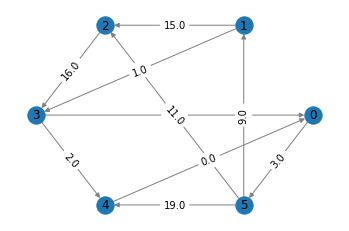

In [4]:
G=nx.from_numpy_array(A,create_using=nx.DiGraph())



edges = G.edges()



for u,v in G.edges():
    G[u][v]['weight'] = WCM[u][v]

# Visualization with edge weights
weights = nx.get_edge_attributes(G, 'weight')
pos=nx.circular_layout(G)

# Visualization with edge widths equal to edge weights
#width = [weights[e] for e in G.edges()]
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw(G, pos, edge_color = 'grey',with_labels=True)


[[ 0. inf inf inf inf  3.]
 [inf  0. 15.  1. inf inf]
 [inf inf  0. 16. inf inf]
 [ 2. inf inf  0.  2. inf]
 [ 1. inf inf inf  0. inf]
 [inf  9. 11. inf 19.  0.]]


array([[ 0., 12., 14., 13., 15.,  3.],
       [ 3.,  0., 15.,  1.,  3.,  6.],
       [18., 30.,  0., 16., 18., 21.],
       [ 2., 14., 16.,  0.,  2.,  5.],
       [ 1., 13., 15., 14.,  0.,  4.],
       [12.,  9., 11., 10., 12.,  0.]])

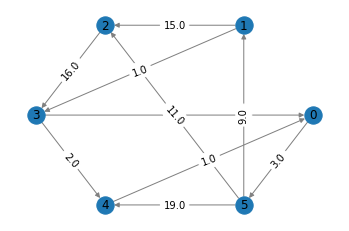

In [5]:
Ap=ToAdj(WCMp)
Gp=nx.from_numpy_array(Ap,create_using=nx.DiGraph())

edges = Gp.edges()



for u,v in Gp.edges():
    Gp[u][v]['weight'] = WCMp[u][v]

# Visualization with edge weights
weightsp = nx.get_edge_attributes(Gp, 'weight')
pos=nx.circular_layout(Gp)

# Visualization with edge widths equal to edge weights
#width = [weights[e] for e in G.edges()]
nx.draw_networkx_edge_labels(G, pos, edge_labels = weightsp)
nx.draw(Gp, pos, edge_color = 'grey',with_labels=True)
print(WCMp)
    
nx.floyd_warshall_numpy(Gp)

**Question 1** Écrire une fonction calculant la matrice des plus courts chemins dans un graphe (donné par sa matrice de pondération).

In [11]:




def FloydWarshall(W):
    """
    Floyd--Warshall algorithm

    :param W: Weight matrix 
    :type W: two dimensionnal numpy array
    :return: the  matrix of shortest path
    :rtype: two dimensionnal numpy array
    """        
      
    n=W.shape[0]
    D=np.copy(W)
    
    for i in range(n):
        if D[i][i]<0:
            print("Negative loop detected")
            return -1
        else:
            D[i][i]=0
            
            
    for k in range(n):
        for i in range(n):
            if D[i][i]<0 :
                print("Negative loop detected")
                return -1   
            else :
                for j in range(n):
                    D[i][j]=min([D[i][k]+D[k][j],D[i][j]])
                
        #print(D)
    #print(D)
    return D


print(FloydWarshall(WCM))
GCM=nx.from_numpy_array(WCM,parallel_edges=False)




[[ 0. 12. 14. 13. 15.  3.]
 [-1.  0. 13.  1.  3.  2.]
 [14. 26.  0. 16. 18. 17.]
 [-2. 10. 12.  0.  2.  1.]
 [ 0. 12. 14. 13.  0.  3.]
 [ 8.  9. 11. 10. 12.  0.]]



**To Do:**

**_question 2_**
Ajouter un garde-fou detectant la présence de cycles de poids négatifs (se reporter au cours)




***

***



# Diamètre, rayon, excentricité



On donne maintenant quelques notions _pour les graphes non-orientés_


L'**excentricité** d'un sommet est la distance maximale de ce sommet aux autres sommets du graphes.

$\xi(i) =  \max_j d_G(i,j) $


Le **_diamètre_** d'un graphe est le maximum des excentricité

$\delta = \max_i \max_j d_G(i,j) $

Le **_rayon_** d'un graphe est le minimum des excentricité


$\rho = \min_i \max_j d_G(i,j) $

**Question 3**

Comment calculer le rayon et le diamètre à partir de la matrice de valuation (on pourra utiliser les algorithmes vus plus tôt) ?

Montrer que le rayon vaut au plus deux fois le diamètre ($\rho(G) \leq \delta(G) \leq 2\rho(G)$) **dans un graphe non-orienté**. Donner des exemples où $\rho(G) = \delta(G)$ et d'autres où $ \delta(G) = 2\rho(G)$

Que peut-on dire dans le cas d'un graphe orienté ? Quelle définition pose problème dans le cas orienté ?

In [12]:
B=np.array(
[[0,1,0,0,0], 
[1,0,1,1,0], 
[0,1,0,1,0], 
[0,1,1,0,1],
[0,0,0,1,0]])


WB=ToWeight(B)


def Diam_Rad(W):
    '''
    Calcule le diamètre et le rayon d'un graphe (peut-être infini)
    

    :param W: Weight matrix 
    :type W: two dimensionnal numpy array
    :return: excentricity, diameter, and radius
    :rtype: np array of float, two float (or np.inf) (or error if negatively weighted cycle
    '''
    D=FloydWarshall(W)
    
    excentricity=[max(D[i]) for i in range(W.shape[0])]
    #print(excentricity)
    return [excentricity,max(excentricity),min(excentricity)]

Diam_Rad(WB)




[[3.0, 2.0, 2.0, 2.0, 3.0], 3.0, 2.0]

**Question 3** 
Dessiner le graphes de manière à illustrer l'excentricité des sommets.

In [13]:
def ErdosRenly(n,p):
    """
     Renvoie la matrice d'adjacence d'un graphe d'Erdös-Renly

    :param n: nombre de sommets
    :type n:  int
    :param p: probabilité d'arête
    :type p:  float entre 0 et 1    
    :return: matrice d'adjacence 
    :rtype: numpy array of int
    """

    A=np.zeros((n,n),int)
    
    ki=0 #current connected component
    for i in range(n):
        for j in range(i):
            A[i][j]=np.random.binomial(1,p)
            A[j][i]=A[i][j]       
    return A


#SBM homebrew

def SBM_homebrew(array,pin,pout):
    """
     Renvoie la matrice d'adjacence d'un SBM

    :param array: tailles des différentes communautés
    :type array:  array of int
    :param pin: probabilité d'arête à l'intérieur d'une communauté
    :type pin:  float entre 0 et 1    
    :param pout: probabilité d'arête entre deux communautés
    :type pout:  float entre 0 et 1       
    :return: matrice d'adjacence 
    :rtype: numpy array of int
    """
    n=np.sum(array)
    ncum=np.cumsum(array)
    
    print(n)
    A=np.zeros((n,n),int)
    print(ncum)
    
    ki=0 #current connected component
    for i in range(n):
        if i>=ncum[ki]:
            ki=ki+1
            #print("i,ki",i,ki)
        kj=ki #current connected component
        for j in range(i+1,n):
            if j>=ncum[kj]:
                kj=kj+1
                #print("i,ki,j,kj",i,ki,j,kj)
               
            if ki==kj:
                A[i][j]=np.random.binomial(1,pin)
                A[j][i]=A[i][j]
            else:
                A[i][j]=np.random.binomial(1,pout)
                A[j][i]=A[i][j]          
    return A

ASBM=SBM_homebrew([10,15,20], 0.5, 0.02)

GSBM=nx.from_numpy_matrix(ASBM)


45
[10 25 45]


tadha [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


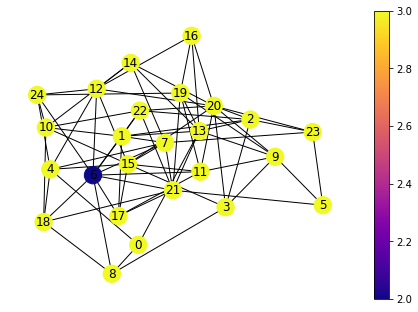

In [14]:

cmap = plt.cm.plasma
ER=ErdosRenly(25, 0.25)

GER=nx.from_numpy_matrix(ER)

WER=ToWeight(ER)

excent=Diam_Rad(WER)[0]

print("tadha",excent)
nx.draw(GER, nodelist=range(len(excent)),node_color=excent,with_labels=True,cmap=cmap,pos=nx.spring_layout(GER))

#scale
vmin=np.min(excent)
vmax=np.max(excent)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.show()


45
[10 25 45]


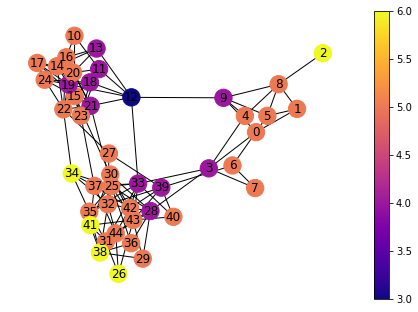

In [15]:
ASBM=SBM_homebrew([10,15,20], 0.4, 0.01)

GSBM=nx.from_numpy_matrix(ASBM)

WSBM=ToWeight(ASBM)

excent=Diam_Rad(WSBM)[0]





nx.draw(GSBM, nodelist=range(len(excent)),node_color=excent,with_labels=True,cmap=cmap,pos=nx.spring_layout(GSBM))


vmin=np.min(excent)
vmax=np.max(excent)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.show()

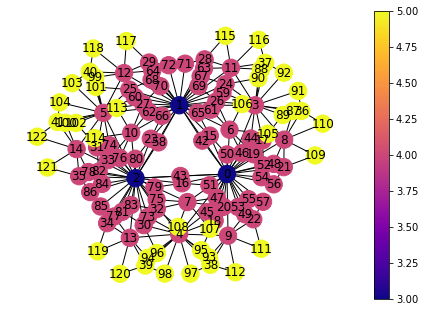

In [16]:
GDGM=nx.generators.classic.dorogovtsev_goltsev_mendes_graph(5)

ADGM=nx.to_numpy_array(GDGM)

WDGM=ToWeight(ADGM)

excent=Diam_Rad(WDGM)[0]





nx.draw(GDGM, nodelist=range(len(excent)),node_color=excent,with_labels=True,cmap=cmap,pos=nx.spring_layout(GDGM))


vmin=np.min(excent)
vmax=np.max(excent)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.show()

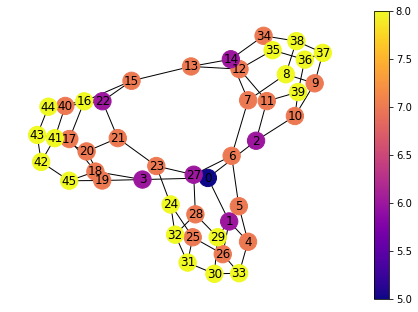

In [17]:
GT=nx.generators.small.tutte_graph()

AT=nx.to_numpy_array(GT)

WT=ToWeight(AT)

excent=Diam_Rad(WT)[0]





nx.draw(GT, nodelist=range(len(excent)),node_color=excent,with_labels=True,cmap=cmap,pos=nx.spring_layout(GT))


vmin=np.min(excent)
vmax=np.max(excent)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.show()